# Projeto Amostragem 


**Populaçao Alvo**: Municipios do Brasil em 2010;              
**Variaveis de interesse**:ESPVIDA,FECT,E_ANOSESTUDO, MORT1, IDHM.                           
**Cadastro**: work.CAD                                         
**Objetivo**: Estimar a média de IDHM dos municipios do Brasil em 2010, a partir de uma amostra.      


Este estudo se concentra na análise de uma série de indicadores de municípios do Brasil no ano de 2010. Nosso principal foco é o Índice de Desenvolvimento Humano Municipal (IDHM), uma medida composta que avalia três dimensões essenciais do desenvolvimento humano: longevidade, educação e renda. O IDHM fornece um retrato abrangente do desenvolvimento humano em um determinado contexto geográfico.

Além do IDHM, também exploraremos outras variáveis importantes. A primeira delas é a expectativa de vida ao nascer (ESPVIDA), uma medida crucial de longevidade e saúde pública. A segunda é a taxa de fecundidade total (FECT), que é um indicador da quantidade média de filhos que uma mulher teria se passasse por todas as idades fecundas. A terceira é a média de anos de estudo (E_ANOSESTUDO), um indicador essencial do nível de educação em um município. Por último, consideraremos a taxa de mortalidade infantil (MORT1), uma métrica importante da saúde e do bem-estar infantil.

A população-alvo deste estudo são todos os municípios do Brasil no ano de 2010, e as variáveis de interesse são o IDHM, ESPVIDA, FECT, E_ANOSESTUDO e MORT1 de cada município neste ano. Os dados para este estudo são extraídos do cadastro "work.CAD".

Embora os dados para essas variáveis estejam disponíveis para todos os municípios, a realidade prática da coleta e análise de dados implica que nem sempre é viável ou necessário analisar todos os dados disponíveis. Por isso, empregamos técnicas de amostragem para selecionar uma parcela representativa da população-alvo e, em seguida, extrapolamos nossas descobertas para a população total.

O objetivo principal deste estudo é estimar a média do IDHM, ESPVIDA, FECT, E_ANOSESTUDO e MORT1 dos municípios do Brasil em 2010, a partir de uma amostra de municípios. Através do emprego de metodologias de amostragem robustas, pretendemos fornecer estimativas confiáveis e precisas dessas variáveis para todos os municípios brasileiros em 2010.

Este estudo é importante não apenas para fornecer uma visão do estado do desenvolvimento humano nos municípios brasileiros em 2010, mas também para demonstrar a eficácia e a eficiência das técnicas de amostragem na obtenção de estimativas precisas a partir de grandes conjuntos de dados. As conclusões extraídas deste estudo podem servir de base para estudos futuros, políticas públicas e tomadas de decisão baseadas em evidências.

In [2]:
import pandas as pd #Análise de dados Tabulares
import math #Operações Matemáticas
import matplotlib.pyplot as plt #Plot de gráficos
import numpy as np  #Operações com vetores e matrizes
from scipy.stats import norm #Distribuições estatísticas

In [3]:
df_municipios = pd.read_excel("Atlas 2013_municipal, estadual e Brasil.xlsx", sheet_name = 1)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_municipios.head()

,ANO,UF,Codmun6,Codmun7,Município,ESPVIDA,FECTOT,MORT1,MORT5,RAZDEP,SOBRE40,SOBRE60,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_0_BASICO,T_ATRASO_0_FUND,T_ATRASO_0_MED,T_ATRASO_1_BASICO,T_ATRASO_1_FUND,T_ATRASO_1_MED,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED,T_FBBAS,T_FBFUND,T_FBMED,T_FBPRE,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLPRE,T_FLSUPER,T_FREQ0A3,T_FREQ11A14,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ4A5,T_FREQ4A6,T_FREQ5A6,T_FREQ6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQFUND45,T_FREQMED1824,T_FREQMED614,T_FREQSUPER1517,T_FUND11A13,T_FUND12A14,T_FUND15A17,T_FUND16A18,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED19A21,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,RDPC1,RDPC10,RDPC2,RDPC3,RDPC4,RDPC5,RDPCT,RIND,RMPOB,RPOB,THEIL,CPR,EMP,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_FORMAL,P_FUND,P_MED,P_SERV,P_SIUP,P_SUPER,P_TRANSF,REN0,REN1,REN2,REN3,REN5,RENOCUP,T_ATIV,T_ATIV1014,T_ATIV1517,T_ATIV1824,T_ATIV18M,T_ATIV2529,T_DES,T_DES1014,T_DES1517,T_DES1824,T_DES18M,T_DES2529,THEILtrab,TRABCC,TRABPUB,TRABSC,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE,T_CRIFUNDIN_TODOS,T_FORA4A5,T_FORA6A14,T_FUNDIN_TODOS,T_FUNDIN_TODOS_MMEIO,T_FUNDIN18MINF,T_M10A14CF,T_M15A17CF,T_MULCHEFEFIF014,T_NESTUDA_NTRAB_MMEIO,T_OCUPDESLOC_1,T_RMAXIDOSO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMEMTOT,HOMENS80,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA,PEA1014,PEA1517,PEA18M,peso1,PESO1114,PESO1113,PESO1214,peso13,PESO15,peso1517,PESO1524,PESO1618,PESO18,Peso1820,PESO1824,Peso1921,PESO25,peso4,peso5,peso6,PESO610,Peso617,PESO65,PESOM1014,PESOM1517,PESOM15M,PESOM25M,pesoRUR,pesotot,pesourb,PIA,PIA1014,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,11,110001,1100015,ALTA FLORESTA D'OESTE,62.01,4.08,45.58,58.05,73.50,83.81,66.87,1.82,6.68,9.74,8.35,23.55,10.82,25.71,15.59,31.39,30.32,33.34,53.26,24.96,27.33,16.63,44.72,39.33,30.11,62.66,76.98,10.28,8.69,0.28,57.69,65.24,3.60,8.69,0.28,NaN,66.19,31.22,8.93,6.10,NaN,NaN,17.29,25.00,65.42,58.08,26.48,4.16,NaN,2.01,0.00,0.00,17.32,22.77,5.84,7.09,12.74,11.65,11.21,3.21,4.31,4.74,3.91,4.91,0.65,39.18,70.52,117.53,235.05,352.58,0.63,39.21,47.11,65.55,71.89,83.15,87.03,52.46,2.26,66.65,7.56,16.90,33.35,96.53,27.75,17.63,198.46,22.46,1041.07,52.57,92.69,163.18,661.37,203.52,36.83,61.89,88.90,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.92,18.47,52.80,6.82,36.80,7.45,NaN,NaN,NaN,34.58,37.10,33.34,NaN,0.00,14.41,6.14,NaN,NaN,1.57,63.20,1684,1584,1413,1212,1109,923,711,521,464,395,327,1580,232,132,54,38,12401,25,1634,1479,1414,1089,980,766,578,440,364,288,219,1587,132,75,47,33,25,11146,NaN,NaN,NaN,NaN,700,2387,1816,1771,1986,14000,1742,5128,1709,12258,1571,3386,1467,8872,633,604,634,3238,7367,428,1479,730,6447,3944,14167,23546,9379,NaN,NaN,NaN,NaN,23417,22835,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,11,110002,1100023,ARIQUEMES,66.02,3.72,32.39,41.41,69.97,88.08,74.23,1.82,7.86,9.35,7.64,17.18,8.00,18.37,10.55,22.32,37.37,40.76,45.41,25.11,26.42,44.13,37.52,32.82,10.45,69.79,82.18,25.02,17.94,2.09,62.78,69.19,11.63,17.94,0.71,NaN,73.34,41.92,13.56,4.15,NaN,NaN,28.59,37.29,70.03,63.94,26.95,6.13,NaN,4.61,0.28,0.38,32.53,41.93,13.67,17.45,22.30,19.98,19.08,4.67,6.30,10.17,5.73,11.67,3.13,72.08,133.98,214.90,419.96,656.26,0.57,18.90,25.47,41.30,52.24,65.78,74.41,44.91,2.62,61.27,9.12,19.77,38.73,94.73,19.69,13.43,319.47,41.90,1434.68,103.82,170.10,302.89,978.66,325.53

In [4]:
df_municipios.shape

(16695, 237)

In [5]:
print(df_municipios.ANO.unique())

[1991 2000 2010]


In [7]:
df_estados = pd.read_excel("Atlas 2013_municipal, estadual e Brasil.xlsx", sheet_name = 2)

In [8]:
df_estados.head()

,ANO,UF,UFN,ESPVIDA,FECTOT,MORT1,MORT5,RAZDEP,SOBRE40,SOBRE60,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_0_BASICO,T_ATRASO_0_FUND,T_ATRASO_0_MED,T_ATRASO_1_BASICO,T_ATRASO_1_FUND,T_ATRASO_1_MED,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED,T_FBBAS,T_FBFUND,T_FBMED,T_FBPRE,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLPRE,T_FLSUPER,T_FREQ0A3,T_FREQ11A14,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ4A5,T_FREQ4A6,T_FREQ5A6,T_FREQ6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQFUND45,T_FREQMED1824,T_FREQMED614,T_FREQSUPER1517,T_FUND11A13,T_FUND12A14,T_FUND15A17,T_FUND16A18,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED19A21,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,RDPC1,RDPC10,RDPC2,RDPC3,RDPC4,RDPC5,RDPCT,RIND,RMPOB,RPOB,THEIL,CPR,EMP,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_FORMAL,P_FUND,P_MED,P_SERV,P_SIUP,P_SUPER,P_TRANSF,REN0,REN1,REN2,REN3,REN5,RENOCUP,T_ATIV,T_ATIV1014,T_ATIV1517,T_ATIV1824,T_ATIV18M,T_ATIV2529,T_DES,T_DES1014,T_DES1517,T_DES1824,T_DES18M,T_DES2529,THEILtrab,TRABCC,TRABPUB,TRABSC,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE,T_CRIFUNDIN_TODOS,T_FORA4A5,T_FORA6A14,T_FUNDIN_TODOS,T_FUNDIN_TODOS_MMEIO,T_FUNDIN18MINF,T_M10A14CF,T_M15A17CF,T_MULCHEFEFIF014,T_NESTUDA_NTRAB_MMEIO,T_OCUPDESLOC_1,T_RMAXIDOSO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMEMTOT,HOMENS80,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA,PEA1014,PEA1517,PEA18M,peso1,PESO1114,PESO1113,PESO1214,peso13,PESO15,peso1517,PESO1524,PESO1618,PESO18,Peso1820,PESO1824,Peso1921,PESO25,peso4,peso5,peso6,PESO610,Peso617,PESO65,PESOM1014,PESOM1517,PESOM15M,PESOM25M,pesoRUR,pesotot,pesourb,PIA,PIA1014,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,11,Rondônia,63.11,3.55,42.41,54.06,74.36,84.85,68.68,2.23,7.55,8.71,7.14,20.29,9.08,22.03,12.92,26.78,32.65,36.53,49.53,22.81,24.88,35.35,44.54,38.59,15.12,70.04,84.91,18.68,13.02,2.05,63.59,70.04,7.59,13.02,0.80,NaN,72.75,43.51,13.89,4.04,NaN,NaN,24.28,33.28,70.43,64.39,33.37,6.56,NaN,4.47,0.10,0.04,26.31,33.36,10.81,14.31,23.91,20.90,19.79,5.66,8.89,10.84,7.55,11.55,2.56,56.41,110.14,188.04,372.95,626.80,0.62,25.17,31.18,48.19,56.44,70.14,76.92,50.31,1.91,65.93,7.27,16.85,34.07,92.38,27.67,18.13,304.90,29.05,1533.92,81.82,146.06,262.47,1005.11,315.52,35.78,66.97,104.92,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.51,37.00,55.52,60.65,60.20,3.81,NaN,NaN,NaN,29.57,32.77,25.73,NaN,0.38,10.31,13.83,NaN,NaN,2.37,39.80,79011,75034,63671,56590,52448,43665,34675,27257,20584,16857,12917,79026,10169,7158,4039,2054,586495,1340,75921,72908,63709,54787,48988,40277,31997,23091,17063,13250,10200,75921,7423,4940,2690,1719,1313,546197,NaN,NaN,NaN,NaN,31095,116320,88807,85251,92356,674871,78735,238757,76333,596136,71369,160022,68903,436114,31481,31418,30537,155151,350206,25253,72908,38709,321447,202951,473365,1132692,659327,NaN,NaN,NaN,NaN,1120423,1082709,0.209,0.168,0.407,0.181,0.635,0.585
1,1991,12,Acre,63.72,4.86,41.85,50.63,90.47,85.84,69.37,3.11,6.56,32.64,26.09,34.79,27.38,36.06,28.41,39.33,30.20,34.85,46.07,19.52,21.58,32.55,50.28,43.57,21.39,64.18,75.55,22.21,13.81,4.01,56.45,58.87,7.78,13.81,1.88,NaN,65.90,49.96,19.85,8.05,NaN,NaN,25.67,31.29,59.24,57.26,39.10,7.89,NaN,6.26,0.18,0.11,20.70,28.42,10.03,14.21,25.74,22.77,21.66,5.17,9.92,12.19,8.40,13.04,2.78,53.03,98.72,169.24,331.42,587.63,0.63,28.43,36.80,52.54,62.35,73.58,80.75,51.61,2.17,66.94,7.36,16.55,33.06,88.83,28.06,18.20,284.96,3

In [14]:
df_estados.shape

(81, 235)

In [15]:
len(df_estados.UF.unique())

27

In [18]:
print(df_estados.UFN.value_counts())

Rondônia               3
Sergipe                3
Goiás                  3
Mato Grosso            3
Mato Grosso do Sul     3
Rio Grande do Sul      3
Santa Catarina         3
Paraná                 3
São Paulo              3
Rio de Janeiro         3
Espírito Santo         3
Minas Gerais           3
Bahia                  3
Alagoas                3
Acre                   3
Pernambuco             3
Paraíba                3
Rio Grande do Norte    3
Ceará                  3
Piauí                  3
Maranhão               3
Tocantins              3
Amapá                  3
Pará                   3
Roraima                3
Amazonas               3
Distrito Federal       3
Name: UFN, dtype: int64


In [9]:
df_municipios_1991 = df_municipios[df_municipios['ANO'] == 1991]
df_municipios_2000 = df_municipios[df_municipios['ANO'] == 2000]

In [14]:
def plot_histogram(df1, df2, var, title, x_label):
    # Calcula as médias
    media_df1 = df1[var].mean()
    media_df2 = df2[var].mean()

    # Histograma das variáveis dos dataframes
    plt.hist(df1[var], bins=10, alpha=0.5, label='2000')
    plt.hist(df2[var], bins=10, alpha=0.5, label='1991')

    # Desenha as linhas de média
    plt.axvline(media_df1, color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(media_df2, color='orange', linestyle='dashed', linewidth=1)

    # Adiciona rótulos e mostra o gráfico
    plt.xlabel(x_label)
    plt.ylabel('Frequência')
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

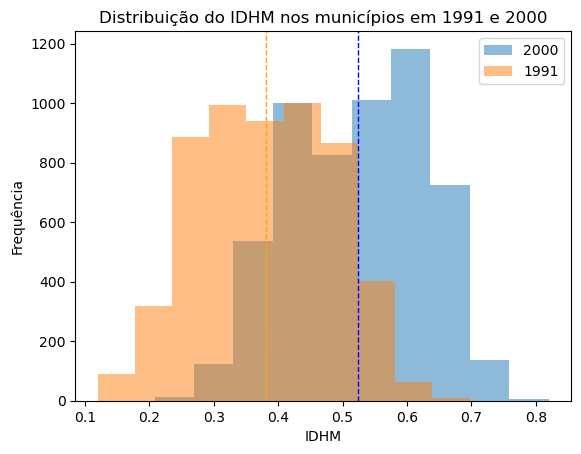

In [15]:
# Utilização da função
plot_histogram(df_municipios_2000, df_municipios_1991, 'IDHM', 'Distribuição do IDHM nos municípios em 1991 e 2000', 'IDHM')

Com base na sua análise dos histogramas para os dados do IDHM dos municípios do Brasil, é possível perceber significativas mudanças na distribuição entre os anos de 1991 e 2000.

Em 1991, a distribuição do IDHM tinha um viés mais acentuado para o lado esquerdo, com a cauda começando em um IDHM de 0,1. Isso indica que havia uma quantidade considerável de municípios com IDHM muito baixo. A cauda direita, por outro lado, terminava em 0,7, indicando que mesmo os municípios com maior IDHM não ultrapassavam esse valor. A concentração média, ou seja, o pico da distribuição, estava entre 0,3 e 0,4, o que sugere que a maioria dos municípios tinha um IDHM relativamente baixo naquela época.

Já em 2000, observa-se uma notável evolução no IDHM dos municípios. A cauda esquerda do histograma começa agora em 0,2, indicando uma elevação no IDHM mínimo quando comparado com 1991. A cauda direita se estende até o valor de 0,8, sinalizando que houve municípios que conseguiram alcançar um IDHM mais elevado em comparação com a década anterior. Além disso, a concentração média se deslocou para o valor de 0,6, um considerável aumento em relação a 1991. Este deslocamento da média indica que a maioria dos municípios experimentou um aumento no IDHM durante este período.

Essas mudanças na distribuição do IDHM entre 1991 e 2000 sugerem uma tendência geral de melhoria no desenvolvimento humano nos municípios brasileiros durante esse intervalo de tempo. No entanto, é importante ressaltar que, apesar dessa tendência positiva, ainda existiam municípios com baixo IDHM em 2000, o que indica a necessidade de políticas públicas e esforços continuados para melhorar o desenvolvimento humano em todo o país.

In [10]:
df_estados_1991 = df_estados[df_estados['ANO'] == 1991]
df_estados_2000 = df_estados[df_estados['ANO'] == 2000]

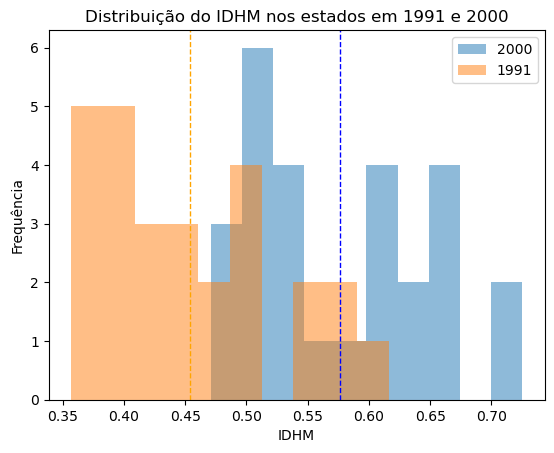

In [18]:
# Utilização da função
plot_histogram(df_estados_2000, df_estados_1991, 'IDHM', 'Distribuição do IDHM nos estados em 1991 e 2000', 'IDHM')

Analisando os histogramas do IDHM por estado nos anos de 1990 e 2000, notamos uma transformação significativa.

Em 1990, a distribuição do IDHM estava concentrada entre 0,35 e 0,55, demonstrando uniformidade no desenvolvimento humano entre os estados.

No entanto, em 2000, o histograma mostra uma melhoria notável. Temos um pico entre 0,47 e 0,55, indicando uma elevação moderada em relação a 1990. O histograma reaparece a partir de 0,60, indicando que alguns estados tiveram avanços consideráveis no desenvolvimento humano.

Portanto, embora o desenvolvimento humano geral tenha melhorado, a taxa de progresso variou bastante entre os estados.

Agora que vimos que os estados tiveram um bom desenvolvimento, vamos olhar quais estados exatamente melhoraram e se algum deles pioraram.

In [ ]:
# Ordene o dataframe por idhm_2000 para tornar o gráfico mais fácil de ler
df_estados_1991 = df_estados_1991.sort_values('IDHM')
df_estados_2000 = df_estados_2000.sort_values('IDHM')

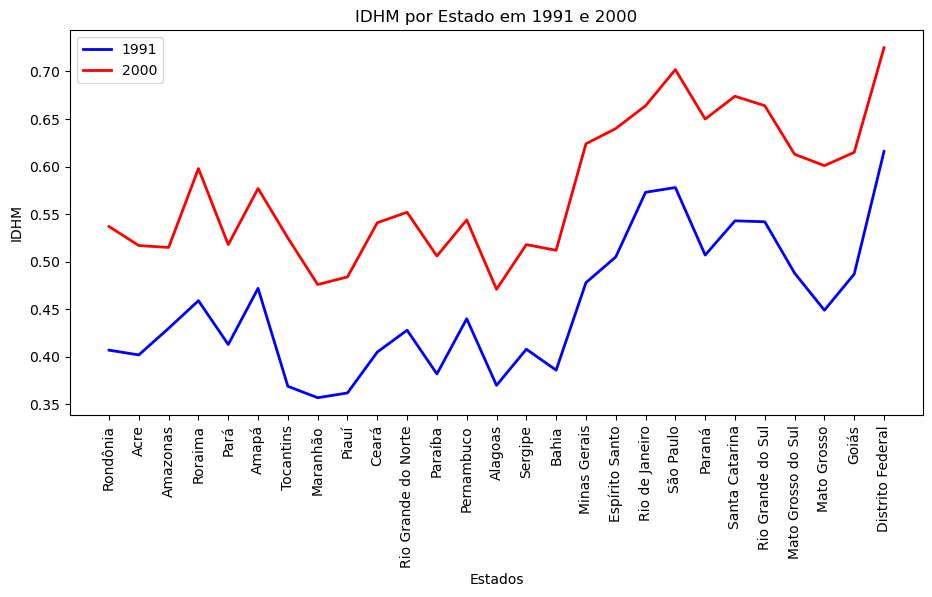

In [40]:
# Crie as linhas
plt.figure(figsize=(11, 5))
plt.plot(df_estados_1991['UFN'], df_estados_1991['IDHM'], marker='', color='b', linewidth=2, label='1991')
plt.plot(df_estados_2000['UFN'], df_estados_2000['IDHM'], marker='', color='r', linewidth=2, label='2000')
# Adicione rótulos, título e legenda e mostre o gráfico
plt.xlabel('Estados')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x em 45 graus
plt.ylabel('IDHM')
plt.title('IDHM por Estado em 1991 e 2000')
plt.legend()
plt.show()

Dessa forma, podemos ver que todos os Estados tiveram uma melhora no IDHM.

# Análise por Região

In [42]:
regioes = {
    'Rondônia': 'Norte',
    'Acre': 'Norte',
    'Amazonas': 'Norte',
    'Roraima': 'Norte',
    'Pará': 'Norte',
    'Amapá': 'Norte',
    'Tocantins': 'Norte',
    'Maranhão': 'Nordeste',
    'Piauí': 'Nordeste',
    'Ceará': 'Nordeste',
    'Rio Grande do Norte': 'Nordeste',
    'Paraíba': 'Nordeste',
    'Pernambuco': 'Nordeste',
    'Alagoas': 'Nordeste',
    'Sergipe': 'Nordeste',
    'Bahia': 'Nordeste',
    'Minas Gerais': 'Sudeste',
    'Espírito Santo': 'Sudeste',
    'Rio de Janeiro': 'Sudeste',
    'São Paulo': 'Sudeste',
    'Paraná': 'Sul',
    'Santa Catarina': 'Sul',
    'Rio Grande do Sul': 'Sul',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Mato Grosso': 'Centro-Oeste',
    'Goiás': 'Centro-Oeste',
    'Distrito Federal': 'Centro-Oeste'
}

# Crie a nova coluna 'regiao' no dataframe
df_estados['regiao'] = df_estados['UFN'].map(regioes)

In [43]:
df_estados_1991 = df_estados[df_estados['ANO'] == 1991]
df_estados_2000 = df_estados[df_estados['ANO'] == 2000]

In [44]:
# Agrupe por região e calcule a média do IDHM para cada ano
idhm_regiao_1991 = df_estados[df_estados['ANO'] == 1991].groupby('regiao')['IDHM'].mean()
idhm_regiao_2000 = df_estados[df_estados['ANO'] == 2000].groupby('regiao')['IDHM'].mean()

In [45]:
# Converta as séries em dataframes e reinicie o índice
idhm_regiao_1991 = idhm_regiao_1991.reset_index()
idhm_regiao_2000 = idhm_regiao_2000.reset_index()

# Altere o nome da coluna IDHM para especificar o ano
idhm_regiao_1991.rename(columns={'IDHM': 'IDHM_1991'}, inplace=True)
idhm_regiao_2000.rename(columns={'IDHM': 'IDHM_2000'}, inplace=True)

# Junte os dois dataframes
df_idhm_regioes = pd.merge(idhm_regiao_1991, idhm_regiao_2000, on='regiao')

In [46]:
df_idhm_regioes['diferenca_media'] = df_idhm_regioes['IDHM_2000'] - df_idhm_regioes['IDHM_1991'] 

In [47]:
df_idhm_regioes

,regiao,IDHM_1991,IDHM_2000,diferenca_media
0,Centro-Oeste,0.510000,0.638500,0.128500
1,Nordeste,0.393111,0.511556,0.118444
2,Norte,0.421714,0.541000,0.119286
3,Sudeste,0.533500,0.657500,0.124000
4,Sul,0.530667,0.662667,0.132000


# Tirando IDHM de 2010 via Amostragem

Assim, para realizar a projeção do IDHM para o ano de 2010 a partir dos dados de 2000, calcularemos o tamanho da amostra necessário usando a fórmula acima. Para fazer isso, precisaremos do tamanho total da população (N), um nível de confiança desejado para determinar z, uma estimativa do desvio padrão (σ) e uma margem de erro aceitável (D).

Fórmula:
$$n_{amo\_est} \geq \frac{N \cdot z^2 \cdot \sigma^2}{N \cdot D^2 + z^2 \cdot \sigma^2}$$

- n_amo_est: Este é o tamanho da amostra que estamos tentando calcular. É a quantidade de observações que precisamos selecionar da nossa população para ter uma estimativa precisa da média.

- N: Este é o tamanho total da população. No nosso caso, é o número total de municípios em 2000.

- z: Este é o valor Z da distribuição normal padrão que corresponde ao nível de confiança que desejamos para a nossa estimativa. Para um nível de confiança de 95%, o valor de z é aproximadamente 1.96. Para um nível de confiança de 99%, o valor de z é aproximadamente 2.57.

- σ: Este é o desvio padrão da população. É uma medida da variabilidade dos dados. Quanto maior o desvio padrão, maior a variabilidade e, portanto, maior o tamanho da amostra necessário para obter uma estimativa precisa.

- D: Esta é a margem de erro tolerável para a nossa estimativa. É a quantidade máxima pela qual esperamos que a nossa estimativa da média possa diferir da média real da população.



Após calcular o tamanho da amostra, podemos então realizar a amostragem dos municípios e calcular a média do IDHM dessa amostra para inferir o IDHM em 2010.

Dessa forma, iremos usar os valores de N que conhecemos do ano 2000 e o valor da variância.

In [82]:
# Estabeleça a semente para resultados reproduzíveis
np.random.seed(0)

In [84]:
df_municipios_2000.IDHM.var()

0.010898551260219193

In [17]:
df_municipios_2000.shape

(5565, 237)

In [18]:
def calculate_n_amo_est(N, D, variancia):
    '''
    N: Tamanho da sua Base de dados
    D: Nível de Confiança
    IDHM_VAR: Variância da variável de interesse
    '''
    z = round(norm.ppf(0.975),2) #1.96 qnorm(0.975) 
    n_amo_est = (N * (z ** 2) * variancia) / (N * (D ** 2) + (z ** 2) * variancia)
    return round(n_amo_est,0)

In [19]:
sample_size = int(calculate_n_amo_est(5565, 0.01, 0.0108))

# Amostra Aleatória Simples (AAS)

In [95]:
df_municipios_2010 = df_municipios[df_municipios['ANO'] == 2010]

In [99]:
amostra_aas = df_municipios_2010['IDHM'].sample(sample_size)

In [199]:
amostra_aas.count()

386

In [100]:
amostra_aas.mean()

0.6578911917098452

# Amostra de Bernoulli

In [185]:
# Definindo a probabilidade para a distribuição de Bernoulli
p = 0.1

# 1. Gera um número aleatório (probabilidade uniforme) para cada linha do DataFrame
uniform_numbers = np.random.uniform(0, 1, df_municipios_2010.shape[0])

# 3. Cria uma sequência de booleanos que é Verdadeira para "sucessos" e Falsa para "falhas"
bernoulli_sample_mask = uniform_numbers < p

# Indexa o DataFrame com essa sequência
df_sample = df_municipios_2010[bernoulli_sample_mask]

# Indexa a coluna 'IDHM' com a sequência Bernoulli
idhm_sample = df_municipios_2010['IDHM'][bernoulli_sample_mask]

print(f"Tamanho da Amostra:{idhm_sample.count()}, \n\nMédia de IDHM da Amostra:{round(idhm_sample.mean(),3)}")

Tamanho da Amostra:544, 

Média de IDHM da Amostra:0.659


# Amostra Sistemática

Este código irá selecionar cada k-ésima linha do DataFrame (ou da coluna 'IDHM').

A amostragem sistemática é útil porque é uma maneira simples de obter uma amostra representativa quando você não tem conhecimento prévio sobre a população. No entanto, ela pode introduzir viés se houver algum tipo de padrão periódico nos dados que corresponda ao intervalo de amostragem.

In [207]:
# Definindo o intervalo de amostragem
k = 14

# Criando a amostra sistemática
df_sample = df_municipios_2010.iloc[::k, :]

# Se você quiser apenas a coluna 'IDHM'
idhm_sample = df_municipios_2010['IDHM'].iloc[::k]

In [205]:
idhm_sample.count()

398

In [206]:
print(f"Tamanho da Amostra:{idhm_sample.count()}, \n\nMédia de IDHM da Amostra:{round(idhm_sample.mean(),3)}")

Tamanho da Amostra:398, 

Média de IDHM da Amostra:0.66


# Amostragem Estratificada
A amostragem estratificada é um método de amostragem em que se divide a população total em diferentes subgrupos ou estratos, e depois seleciona amostras de cada estrato.

In [208]:
# Suponha que você queira estratificar por uma coluna chamada 'Estrato'
stratified_sample = df_municipios_2010.groupby('UF', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

In [209]:
stratified_sample.shape

(556, 237)

In [210]:
stratified_sample.IDHM.mean()

0.6581924460431655

# Demais Variáveis 

In [48]:
df_municipios_2010 = df_municipios[df_municipios['ANO'] == 2010]

In [49]:
df_estados_2010 = df_estados[df_estados['ANO'] == 2010]

In [33]:
int(calculate_n_amo_est(5565, 0.01, df_municipios_2000[var].var()))

389

In [34]:
5565 / 389

14.305912596401027

In [41]:
from scipy.stats import norm

# Lista de variáveis
variables = ['ESPVIDA','FECTOT','E_ANOSESTUDO', 'MORT1', 'IDHM']

# Função para calcular o tamanho da amostra
def calculate_n_amo_est(N, D, variancia):
    z = round(norm.ppf(0.975),2)
    n_amo_est = (N * (z ** 2) * variancia) / (N * (D ** 2) + (z ** 2) * variancia)
    return round(n_amo_est,0)

for var in variables:
    D = round(df_municipios_2000[var].max(),0)*0.01
    sample_size = int(calculate_n_amo_est(5565, D, df_municipios_2000[var].var()))

    # Amostragem Aleatória Simples (AAS)
    amostra_aas = df_municipios_2010[var].sample(sample_size)
    print(f"Variável: {var}")
    print(f"Tamanho da Amostra AAS:{amostra_aas.count()}, Média da Amostra AAS:{round(amostra_aas.mean(),3)}")

    # Amostragem de Bernoulli
    p = 0.1
    uniform_numbers = np.random.uniform(0, 1, df_municipios_2010.shape[0])
    bernoulli_sample_mask = uniform_numbers < p
    idhm_sample_bernoulli = df_municipios_2010[var][bernoulli_sample_mask]
    print(f"Tamanho da Amostra Bernoulli:{idhm_sample_bernoulli.count()}, Média da Amostra Bernoulli:{round(idhm_sample_bernoulli.mean(),3)}")

    # Amostragem Sistemática
    k = 14
    idhm_sample_systematic = df_municipios_2010[var].iloc[::k]
    print(f"Tamanho da Amostra Sistemática:{idhm_sample_systematic.count()}, Média da Amostra Sistemática:{round(idhm_sample_systematic.mean(),3)}")

    # Amostragem Estratificada
    stratified_sample = df_municipios_2010.groupby('UF', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.07))
    stratified_sample_mean = stratified_sample[var].mean()
    print(f"Tamanho da Amostra Estratificada: {len(stratified_sample)}, Média da Amostra Estratificada: {round(stratified_sample_mean,3)}\n\n---")


Variável: ESPVIDA
Tamanho da Amostra AAS:100, Média da Amostra AAS:72.536
Tamanho da Amostra Bernoulli:588, Média da Amostra Bernoulli:73.162
Tamanho da Amostra Sistemática:398, Média da Amostra Sistemática:73.046
Tamanho da Amostra Estratificada: 390, Média da Amostra Estratificada: 72.948

---
Variável: FECTOT
Tamanho da Amostra AAS:307, Média da Amostra AAS:2.19
Tamanho da Amostra Bernoulli:559, Média da Amostra Bernoulli:2.236
Tamanho da Amostra Sistemática:398, Média da Amostra Sistemática:2.195
Tamanho da Amostra Estratificada: 390, Média da Amostra Estratificada: 2.198

---
Variável: E_ANOSESTUDO
Tamanho da Amostra AAS:648, Média da Amostra AAS:9.44
Tamanho da Amostra Bernoulli:592, Média da Amostra Bernoulli:9.453
Tamanho da Amostra Sistemática:398, Média da Amostra Sistemática:9.454
Tamanho da Amostra Estratificada: 390, Média da Amostra Estratificada: 9.513

---
Variável: MORT1
Tamanho da Amostra AAS:744, Média da Amostra AAS:19.091
Tamanho da Amostra Bernoulli:549, Média da 

In [29]:
variables = ['ESPVIDA','FECTOT','E_ANOSESTUDO', 'MORT1', 'IDHM']

In [32]:
for i in variables:
    print(f"Média Populacional da Variável {i} é :{round(df_municipios_2010[i].mean(),3)}")

Média Populacional da Variável ESPVIDA é :73.089
Média Populacional da Variável FECTOT é :2.19
Média Populacional da Variável E_ANOSESTUDO é :9.464
Média Populacional da Variável MORT1 é :19.247
Média Populacional da Variável IDHM é :0.659


# Região

In [50]:
df_regiao_2010 = df_estados_2010[['UF', 'UFN', 'regiao']]

In [51]:
df_municipios_2010.shape

(5565, 237)

In [63]:
df_estados = pd.merge(df_regiao_2010, df_municipios_2010, on = 'UF', how='inner')

In [64]:
df_estados.shape

(5565, 239)

In [62]:
round(df_regiao[var].max(),0)*0.001

0.001

In [70]:
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
variables = ['ESPVIDA','FECTOT','E_ANOSESTUDO', 'MORT1', 'IDHM']

def calculate_n_amo_est(N, D, variancia):
    z = round(norm.ppf(0.975),2)
    n_amo_est = (N * (z ** 2) * variancia) / (N * (D ** 2) + (z ** 2) * variancia)
    return round(n_amo_est,0)

for regiao in regioes:
    df_regiao = df_estados[df_estados['regiao'] == regiao]

    for var in variables:
        D = round(df_regiao[var].max(),0)*0.01
        sample_size = int(calculate_n_amo_est(len(df_regiao), D, df_regiao[var].var()))

        # Amostragem Aleatória Simples (AAS)
        amostra_aas = df_regiao[var].sample(sample_size)
        print(f"Região: {regiao}, Variável: {var}")
        print(f"Tamanho da Amostra AAS:{amostra_aas.count()}, Média da Amostra AAS:{round(amostra_aas.mean(),3)}")

        # Amostragem de Bernoulli
        p = 0.1
        uniform_numbers = np.random.uniform(0, 1, df_regiao.shape[0])
        bernoulli_sample_mask = uniform_numbers < p
        var_sample_bernoulli = df_regiao[var][bernoulli_sample_mask]
        print(f"Tamanho da Amostra Bernoulli:{var_sample_bernoulli.count()}, Média da Amostra Bernoulli:{round(var_sample_bernoulli.mean(),3)}")

        # Amostragem Sistemática
        k = int(len(df_regiao) / sample_size)
        var_sample_systematic = df_regiao[var].iloc[::k]
        print(f"Tamanho da Amostra Sistemática:{var_sample_systematic.count()}, Média da Amostra Sistemática:{round(var_sample_systematic.mean(),3)}\n\n---")

        


Região: Norte, Variável: ESPVIDA
Tamanho da Amostra AAS:19, Média da Amostra AAS:72.238
Tamanho da Amostra Bernoulli:52, Média da Amostra Bernoulli:71.886
Tamanho da Amostra Sistemática:20, Média da Amostra Sistemática:71.391

---
Região: Norte, Variável: FECTOT
Tamanho da Amostra AAS:258, Média da Amostra AAS:2.946
Tamanho da Amostra Bernoulli:32, Média da Amostra Bernoulli:2.898
Tamanho da Amostra Sistemática:449, Média da Amostra Sistemática:2.959

---
Região: Norte, Variável: E_ANOSESTUDO
Tamanho da Amostra AAS:222, Média da Amostra AAS:8.564
Tamanho da Amostra Bernoulli:48, Média da Amostra Bernoulli:8.545
Tamanho da Amostra Sistemática:225, Média da Amostra Sistemática:8.595

---
Região: Norte, Variável: MORT1
Tamanho da Amostra AAS:255, Média da Amostra AAS:21.632
Tamanho da Amostra Bernoulli:42, Média da Amostra Bernoulli:21.171
Tamanho da Amostra Sistemática:449, Média da Amostra Sistemática:21.578

---
Região: Norte, Variável: IDHM
Tamanho da Amostra AAS:106, Média da Amostra

In [71]:
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
variables = ['ESPVIDA','FECTOT','E_ANOSESTUDO', 'MORT1', 'IDHM']


for regiao in regioes:
    df_regiao = df_estados[df_estados['regiao'] == regiao]

    for i in variables:
        print(f"Média Populacional da Região {regiao} para variável {i} é {round(df_regiao[i].mean(),3)}")


Média Populacional da Região Norte para variável ESPVIDA é 71.818
Média Populacional da Região Norte para variável FECTOT é 2.959
Média Populacional da Região Norte para variável E_ANOSESTUDO é 8.559
Média Populacional da Região Norte para variável MORT1 é 21.578
Média Populacional da Região Norte para variável IDHM é 0.608
Média Populacional da Região Nordeste para variável ESPVIDA é 70.255
Média Populacional da Região Nordeste para variável FECTOT é 2.365
Média Populacional da Região Nordeste para variável E_ANOSESTUDO é 8.934
Média Populacional da Região Nordeste para variável MORT1 é 27.188
Média Populacional da Região Nordeste para variável IDHM é 0.591
Média Populacional da Região Sudeste para variável ESPVIDA é 74.686
Média Populacional da Região Sudeste para variável FECTOT é 1.987
Média Populacional da Região Sudeste para variável E_ANOSESTUDO é 9.636
Média Populacional da Região Sudeste para variável MORT1 é 15.512
Média Populacional da Região Sudeste para variável IDHM é 0.6